In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# text/file processing libraries
import string
import re
import sys
from nltk.corpus import stopwords
#from wordcloud import STOPWORDS
from itertools import chain
# warnings
import warnings
import statsmodels as sm
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
warnings.filterwarnings('ignore')
# set seed for reproducibility
np.random.seed(0)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [2]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.3 MB/s eta 0:00:00


In [3]:
df = pd.read_excel("../input/clientbank/client_bank.xlsx")
np.random.seed(0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              2000 non-null   int64  
 1   Months as a Customer             2000 non-null   int64  
 2   Number of Products               2000 non-null   int64  
 3   RFM Score                        693 non-null    float64
 4   Average Balance Feed Index       695 non-null    float64
 5   Number of Transactions           2000 non-null   int64  
 6   Personal Debt to Equity Ratio    2000 non-null   int64  
 7   Months Current Account           2000 non-null   int64  
 8   Number of Loan Accounts          2000 non-null   int64  
 9   Customer ID                      2000 non-null   int64  
 10  Has Bad Payment Record           2000 non-null   int64  
 11  Members Within Household         2000 non-null   int64  
 12  Number of Call Cente

In [5]:
#preparation des donnees 
y = df.iloc[:,-1]
#X (les autres) sont les variables qui précèdent la dernière
X= df.iloc[:,:-1]

<AxesSubplot:xlabel='Interested in Credit Card', ylabel='count'>

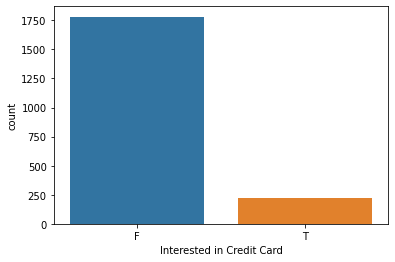

In [6]:
sb.countplot(x=y,data=X)

In [7]:
# Division de la bd
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
# Sur-échantillonnage
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(x_train, y_train)
x_rtest, y_rtest = rOs.fit_resample(x_test, y_test)
print(X_ro.shape)
print(x_rtest.shape)

(2504, 30)
(1058, 30)


<AxesSubplot:xlabel='Interested in Credit Card', ylabel='count'>

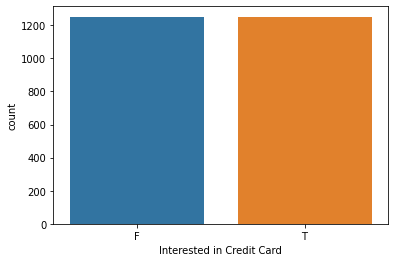

In [8]:
sb.countplot(x=y_ro,data=X_ro)

Text(0.5, 1.0, 'Scaled data')

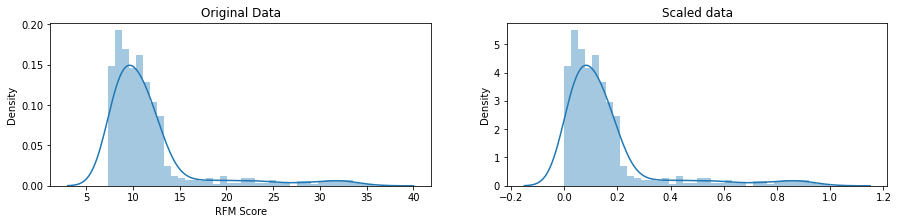

In [9]:
original_data = pd.DataFrame(df["RFM Score"])

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['RFM Score'])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sb.distplot(df["RFM Score"], ax=ax[0])
ax[0].set_title("Original Data")
sb.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Text(0.5, 1.0, 'Normalized data')

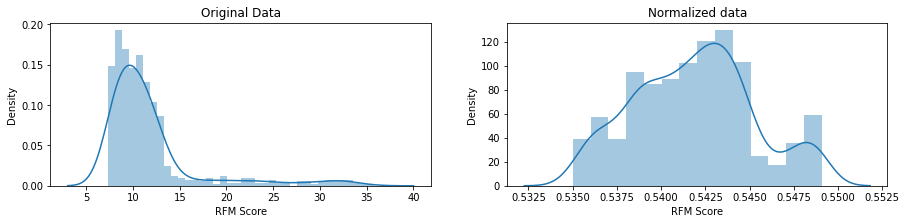

In [10]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = df["RFM Score"] > 0

# get only positive pledges (using their indexes)
positive_pledges = df["RFM Score"].loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='RFM Score', index=positive_pledges.index)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sb.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sb.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

In [11]:
print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 0     9.82899
1    11.80799
5    11.81900
8     7.87900
9     9.91999
Name: RFM Score, dtype: float64
Minimum value: 7.279 
Maximum value: 35.761555
______________________________

Normalized data
Preview:
 0    0.541274
1    0.543718
5    0.543729
8    0.537008
9    0.541417
Name: RFM Score, dtype: float64
Minimum value: 0.5350125221000186 
Maximum value: 0.5490683109891858
